In [44]:
%pylab inline
import scipy.io
import numpy as np
from rasterio.features import shapes

from shapely.geometry import shape, GeometryCollection, MultiLineString, LineString
from scipy.ndimage import filters
from scipy.signal.signaltools import medfilt2d
from shapely.geometry import mapping
from scipy.ndimage.morphology import binary_erosion, binary_dilation


Populating the interactive namespace from numpy and matplotlib


/Users/mirkodandrea/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [65]:
import pickle
values, transf = pickle.load(open('test_data_60.p', 'rb'))

In [66]:
def smooth_linestring(linestring, smooth_sigma):
    """
    Uses a gauss filter to smooth out the LineString coordinates.
    """
    smooth_x = np.array(
        filters.gaussian_filter1d(
            linestring.xy[0],
            smooth_sigma
        ))
    smooth_y = np.array(
        filters.gaussian_filter1d(
            linestring.xy[1],
            smooth_sigma
        ))

    # close the linestring
    smooth_y[-1] = smooth_y[0]
    smooth_x[-1] = smooth_x[0]

    smoothed_coords = np.hstack((smooth_x, smooth_y))
    smoothed_coords = zip(smooth_x, smooth_y)

    linestring_smoothed = LineString(smoothed_coords)

    return linestring_smoothed


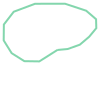

In [67]:
thresholds = [0.5, 0.75, 0.9]
med_filt_val = 9
min_length = 0.00001
smooth_sigma = 1.0
simp_fact=0.00001

#if the dimension of the burned area is low, we do not filter it
if np.sum(values > 0) <= 100:
    filt_values = values
else:
    filt_values = medfilt2d(values, med_filt_val)


t  = 0.75
over_t_ = (filt_values >= t).astype('uint8')
over_t = binary_dilation(binary_erosion(over_t_).astype('uint8')).astype('uint8')
g = None
if np.sum(over_t)>4:
    for s, v in shapes(over_t, transform=transf):
        sh = shape(s)

        
        #if len(sh.interiors):
        ml = [smooth_linestring(l, smooth_sigma).simplify(simp_fact) for l in sh.interiors if l.length > min_length]
        #else:
        #ml = [smooth_linestring(sh.exterior, smooth_sigma).simplify(simp_fact)]

        g = MultiLineString(ml)
        
display(g)

    

In [26]:
display(sh.interiors)

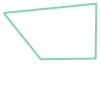

/Users/mirkodandrea/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:44: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


<function __main__.test>

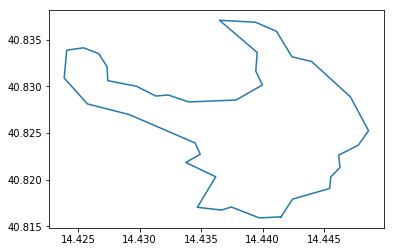

In [64]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(test, med_filt_val=3, min_length=0.1, smooth_sigma=0.7, simp_fact=0.0003)